In [15]:
import pandas as pd
import numpy as np

from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

from astropy import units as u
from astropy import coordinates as coord
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.utils.data import get_pkg_data_filename

from urllib.request import urlretrieve

R1 = np.linspace(0*u.pc, 100*u.pc, 10000)
t1 = np.linspace(0*u.kyr, 100*u.kyr, 100)
E1 = np.linspace(10000*u.eV, 1000000000000*u.eV, 100000)

# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system

@u.quantity_input(E = u.erg)
def dNdE(E, Emax = 5*u.PeV, Emin=1*u.GeV, n = 0.25, Esn = 1e52*u.erg, alpha = 1):
    n0 = (n*Esn*(-alpha+2))/(Emax**(2-alpha)-Emin**(2-alpha))*E**-alpha
    return n0

@u.quantity_input(E=u.erg)
def diffusion(E, B = 50 * u.G*1e-6, x = 0.1, delta = 0.5):
    Dn = 3*10**27 * 0.1 
    dif = x * Dn * ((3*E/(u.GeV))/(10*B/(u.G*1e-6)))**delta
    return dif * u.cm**2 * u.s**-1

@u.quantity_input(E=u.erg, R=u.pc, t=u.yr)
def constantEVar(E, R, t, alpha = 2.7, delta = 0.45):
    Tpp = 6*(10**7) * u.yr
    Rdif = 2 * np.sqrt(diffusion(E) * t * (np.exp(t*delta/Tpp)-1)/(t*delta/Tpp))

    dist = dNdE(E)/((np.pi**(3/2))*(Rdif**3))*np.exp(-(alpha-1)*(t/Tpp)-(R**2)/(Rdif**2))

    return dist

E = float(input("At what energy ? ").strip())
if(E == 0):
    E = 5*u.TeV

T = float(input("At what time ? ").strip())
if(T == 0):
    T = 50*u.kyr

R = float(input("At what radius ? ").strip())
if(R == 0):
    R = 50*u.pc
    

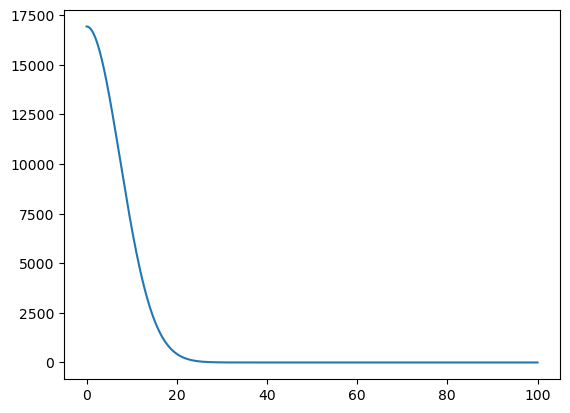

In [16]:
plt.plot(R1, constantEVar(E, R1, T))

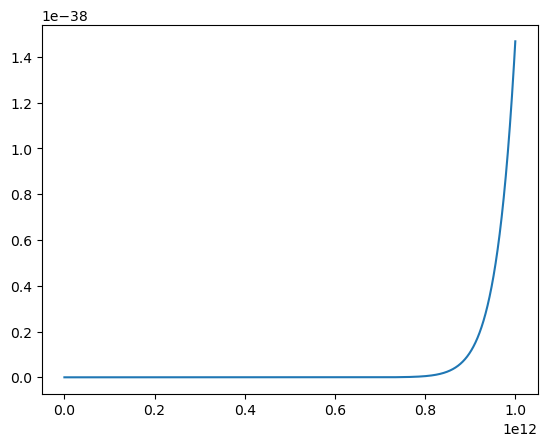

In [17]:
plt.plot(E1, constantEVar(E1, R, T))

C:\Users\aiden\anaconda3\envs\pracs\Lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


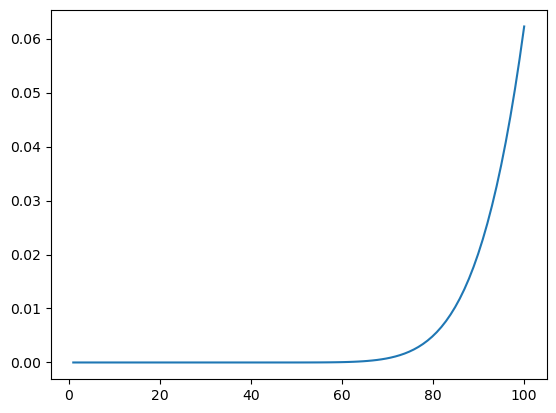

In [18]:
plt.plot(t1, constantEVar(E, R, t1))